In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import tensorflow

In [3]:
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
train_data=pd.read_csv("/content/drive/MyDrive/train1.csv")
test_data=pd.read_csv("/content/drive/MyDrive/test1.csv")
submission_data=pd.read_csv("/content/drive/MyDrive/sample_submission (1).csv")

In [12]:
train_data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
test_data.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
train_data.columns

Index(['label', 'pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5',
       'pixel6', 'pixel7', 'pixel8',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=785)

In [33]:
y_train=train_data['label']
X_train=train_data.drop(columns=['label'],axis=1)
#normalize the dataset by dividing it by 255
X_train=X_train/255.0 #pixel value range from 0-255
test=test_data/255.0

In [39]:
X_train.shape

(42000, 784)

In [40]:
train_data.isnull().sum()

,0
label,0
pixel0,0
pixel1,0
pixel2,0
pixel3,0
...,...
pixel779,0
pixel780,0
pixel781,0
pixel782,0


In [41]:
test_data.isnull().sum()

,0
pixel0,0
pixel1,0
pixel2,0
pixel3,0
pixel4,0
...,...
pixel779,0
pixel780,0
pixel781,0
pixel782,0


In [42]:
X_train = X_train.values.reshape(-1,28,28,1)

test = test.values.reshape(-1,28,28,1)

In [43]:
from tensorflow.keras.utils import to_categorical

In [44]:
y_train=to_categorical(y_train,num_classes=10)

In [45]:
from sklearn.model_selection import train_test_split

In [46]:
X_train,x_val,y_train,y_val=train_test_split(X_train,y_train,test_size=0.1,random_state=42)

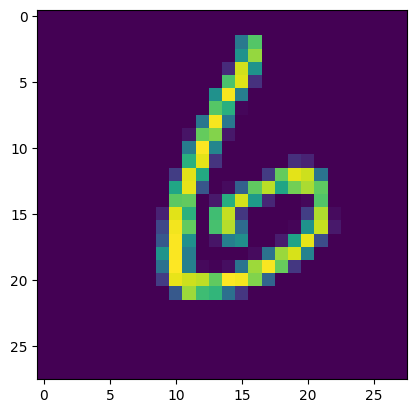

In [47]:
plt.imshow(X_train[2])

In [48]:
X_train[0]

array([[[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        

In [56]:
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dropout
model=Sequential()

#flatten layer - convert high dimentional data into 1D array
model.add(Flatten(input_shape=(28,28,1)))

#hidden layer
model.add(Dense(128,activation='relu'))

#output layer
model.add(Dense(10,activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [57]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [60]:
y_train = np.argmax(y_train, axis=1)
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam')

In [61]:
model.fit(X_train,y_train,epochs=10,validation_split=0.2)

Epoch 1/10
945/945 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.5368 - val_loss: 0.2025
Epoch 2/10
945/945 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.1615 - val_loss: 0.1468
Epoch 3/10
945/945 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 0.1066 - val_loss: 0.1325
Epoch 4/10
945/945 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.0707 - val_loss: 0.1149
Epoch 5/10
945/945 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.0557 - val_loss: 0.1054
Epoch 6/10
945/945 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - loss: 0.0433 - val_loss: 0.1068
Epoch 7/10
945/945 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - loss: 0.0355 - val_loss: 0.1003
Epoch 8/10
945/945 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - loss: 0.0261 - val_loss: 0.1027
Epoch 9/10
945/945 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 0.0189 - val_loss: 0.1080
Epoch 10/10
945/945 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - loss: 0.0149 - val_loss: 0.1062


In [65]:
y_prob=model.predict(x_val)

132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [66]:
y_prob

array([[2.13912614e-07, 7.15219767e-06, 4.09255037e-04, ...,
        4.44300986e-06, 9.99332845e-01, 1.07229107e-06],
       [2.28482833e-07, 9.99567688e-01, 1.02544129e-06, ...,
        3.96750547e-04, 9.34044965e-06, 3.80633537e-07],
       [2.34108155e-09, 1.36944083e-08, 9.63894742e-10, ...,
        1.50594715e-04, 1.31314650e-07, 9.99829531e-01],
       ...,
       [3.63315183e-10, 8.84030849e-10, 1.08158440e-06, ...,
        9.99997914e-01, 1.42151513e-10, 8.52387416e-07],
       [3.46287038e-07, 1.13512325e-11, 4.63942388e-06, ...,
        9.97249305e-01, 1.98247335e-07, 2.72217859e-03],
       [1.33147160e-09, 2.52603893e-09, 1.18547616e-09, ...,
        3.73391595e-11, 2.96930907e-08, 5.37736810e-07]], dtype=float32)

In [67]:
y_pred=y_prob.argmax(axis=1)

In [71]:
y_val_numerical = np.argmax(y_val, axis=1)

In [72]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_val_numerical,y_pred)
print(accuracy)

0.9726190476190476
